<a href="https://colab.research.google.com/github/ziedjouini/new_projet/blob/main/Ensemble_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicing ensemble learning**
Download the following [Spotify dataset](https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip).

Execute the following tasks:
* Build a classification or regression model with this dataset
* Evaluate the performance of your  model using accuracy score, RMSE or R_squared
* Apply 3 ensemble techniques of your choice on the dataset
* Compare the obtained results with your individual model


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier,BaggingClassifier


In [ ]:
# Your code here
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
spotify = pd.read_csv(link, usecols=['genre','popularity','acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence'])

In [ ]:
spotify.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
spotify.shape, spotify.isna().sum().sum()

((232725, 15), 0)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  object 
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  object 
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  object 
 14  valence           232725 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 26.6+ MB


In [ ]:
spotify.genre.value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [ ]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


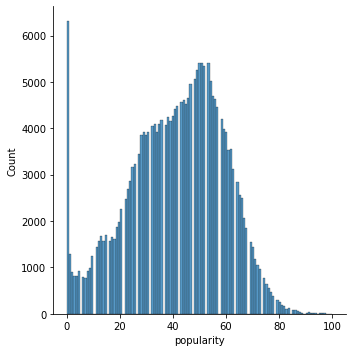

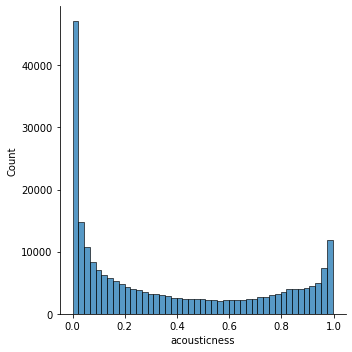

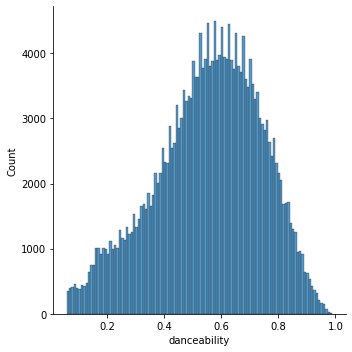

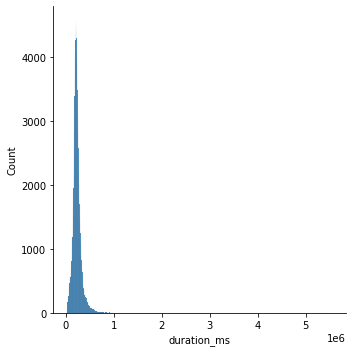

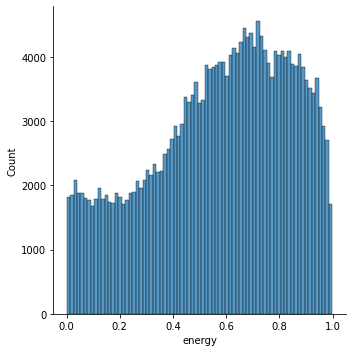

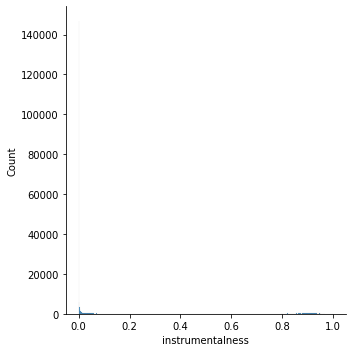

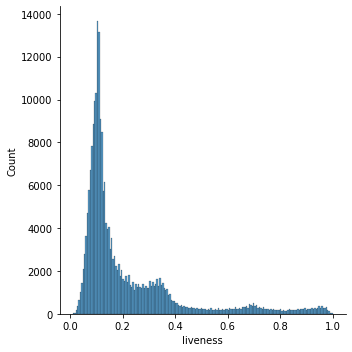

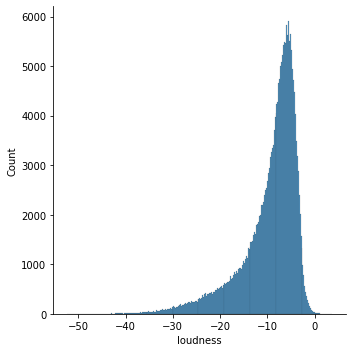

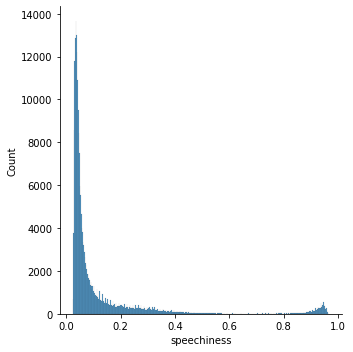

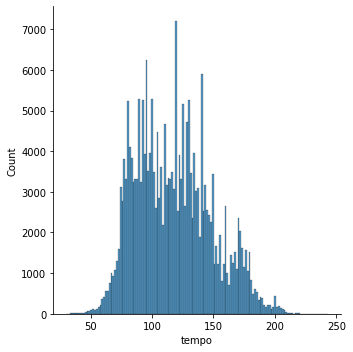

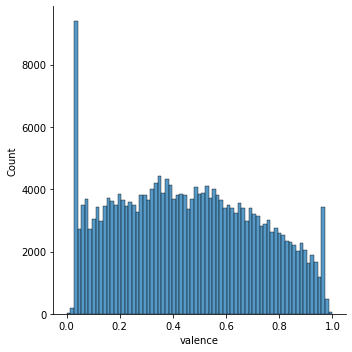

In [ ]:
for column in spotify.select_dtypes("number").columns :
    sns.displot(spotify[column])

In [ ]:
for column in spotify.select_dtypes("object").columns :
    print(spotify[column].value_counts())


genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64
key
C     27583
G     26390
D     24077
C#    23201
A     22671
F     20279
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: count, dtype: int64
mode
Major    151744
Minor     80981
Name: count, dtype: int64
time_signature
4/4    200760
3/4     24111
5/4      5238

In [ ]:
X = spotify.drop(columns="mode")
y = spotify['mode']

In [ ]:
pipe = make_column_transformer(
    (StandardScaler(),X.select_dtypes('number').columns),
    (OneHotEncoder(handle_unknown='ignore'),X.select_dtypes('object').columns)
)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((174543, 14), (58182, 14), (174543,), (58182,))

# LogisticRegression

In [ ]:
Logreg = make_pipeline(pipe, LogisticRegression())

In [ ]:
Logreg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['genre', 'key', 'time_signature'], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
Logreg.score(X_test,y_test)

0.6942525179608814

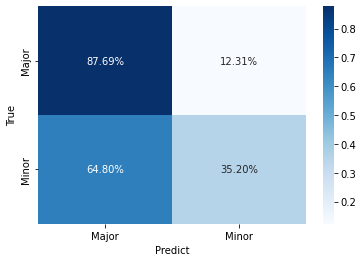

In [ ]:
sns.heatmap(confusion_matrix(y_test, Logreg.predict(X_test),normalize='true' ),xticklabels=Logreg.classes_, yticklabels=Logreg.classes_, cmap="Blues",annot=True, fmt=".2%")

plt.xlabel('Predict')
plt.ylabel('True')

plt.show()

# AdaBoostClassifier

In [ ]:
adaboost = make_pipeline(pipe, AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100))

In [ ]:
adaboost.fit(X_train, y_train)

/Applications/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['genre', 'key', 'time_signature'], dtype='object'))])),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                    n_estimators=100))])

In [ ]:
adaboost.score(X_test,y_test)

0.6882369117596507

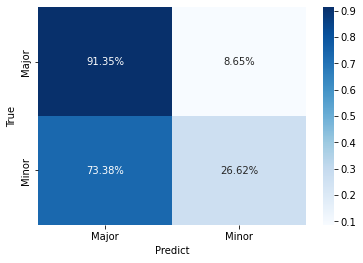

In [ ]:
sns.heatmap(confusion_matrix(y_test, adaboost.predict(X_test),normalize='true' ),xticklabels=adaboost.classes_, yticklabels=adaboost.classes_, cmap="Blues",annot=True, fmt=".2%")

plt.xlabel('Predict')
plt.ylabel('True')

plt.show()

# StackingClassifier

In [ ]:
stack = make_pipeline(
    pipe,
    StackingClassifier(
        estimators = [('tree',DecisionTreeClassifier(max_depth=10)),('ridge',RidgeClassifier()),('logreg',LogisticRegression())],
        final_estimator=LogisticRegression(), n_jobs=-1
    )
)

In [ ]:
stack.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['genre', 'key', 'time_signature'], dtype='object'))])),
                ('stackingclassifier',
                 StackingClassifier(estimators=[('tree',
                                                 DecisionTreeClassifier(max_depth=10)),
                                                ('ridge', RidgeClassifier()),
                                                ('logreg',
                                                 LogisticRegression())],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [ ]:
stack.score(X_test,y_test)

0.7041524870234781

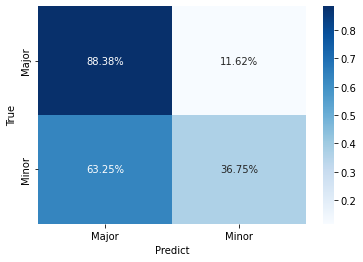

In [ ]:
sns.heatmap(confusion_matrix(y_test, stack.predict(X_test),normalize='true' ),xticklabels=stack.classes_, yticklabels=stack.classes_, cmap="Blues",annot=True, fmt=".2%")

plt.xlabel('Predict')
plt.ylabel('True')

plt.show()

# BaggingClassifier

In [ ]:
bag = make_pipeline(
    pipe,
    BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=100,n_jobs=-1)
)

In [ ]:
bag.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['genre', 'key', 'time_signature'], dtype='object'))])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=LogisticRegression(),
                                   n_estimators=100, n_jobs=-1))])

In [ ]:
bag.score(X_test,y_test)

0.6942697054071706

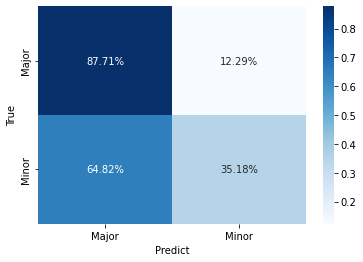

In [ ]:
sns.heatmap(confusion_matrix(y_test, bag.predict(X_test),normalize='true' ),xticklabels=bag.classes_, yticklabels=bag.classes_, cmap="Blues",annot=True, fmt=".2%")

plt.xlabel('Predict')
plt.ylabel('True')

plt.show()